# Lab 5: Resampling and the Bootstrap

Welcome to Lab 5!

We will attempt to estimate the number `N`, a *population parameter*, that represents the number of elements in a population. We get to observe a uniform random sample of the elements, and for each one we can observe its serial number (from 1 to `N`). All elements are labeled with consecutive serial numbers from 1 to `N`, so `N` is the total number of elements. 

Given *just* a random sample of elements, we'll estimate `N`, and then we'll use simulation to find a confidence interval around our estimate, all without ever looking at the whole population.  This is an example of *statistical inference*.

As usual, **run the cell below** to prepare the lab and the automatic tests.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

# Don't change this cell; just run it. 
from okgrade import grade

## 1. Preliminaries
The setup: We want to know the number of elements in the population.  That number is `N`.  Each element is numbered from 1 to `N`.

We only see a small number of elements (assumed to be a uniform random sample with replacement from among all the elements), so we have to use estimation.

#### Question 1.1
Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?

parameter, statistic

Check your answer by posting on the discussion forum.

To make the situation realistic, we're going to hide the true number of elements from you.  You'll have access only to this random sample:

In [2]:
observations = Table.read_table("serial_numbers.csv")
num_observations = observations.num_rows
observations

serial number
47
42
57
79
26
23
36
64
83
135


#### Question 1.2
Define a function named `plot_serial_numbers` to make a histogram of any table of serial numbers.  It should take one argument, a table like `observations` with one column called `"serial number"`.  It should plot a histogram of the values in the column **using bins of width 1** ranging from **1 to 200** but return nothing.  Then, call that function to make a histogram of `observations`.

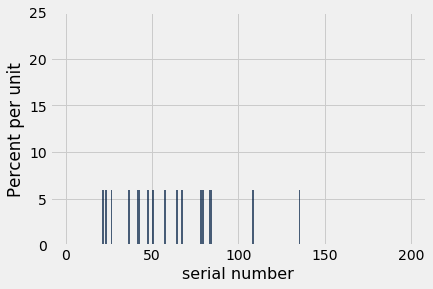

In [3]:
def plot_serial_numbers(numbers):
    numbers.hist(bins=np.arange(1,200,1))
    
    # Assuming the lines above produce a histogram, this next
    # line may make your histograms look nicer.  Feel free to
    # delete it if you want.
    plt.ylim(0, .25)

plot_serial_numbers(observations)

#### Question 1.3
By looking at the histogram, what can we say about `N` immediately? (Hint: What is the relationship between `N` and the largest serial number in `observations`?) What does each little bar in the histogram represent? Why are all the bars the same height?

We can immediately say that N is most likely a value larger than the on erepresented by the bar that is the farthest to the right on the graph. Each bar represents a serial number that was observed. All the bars are the same height because none of the serial numbers were recorded more than once.

#### Question 1.4
One way to estimate `N` is to take twice the mean of the serial numbers we observe. Write a function that computes that statistic.  It should take as its argument an array of serial numbers and return twice their mean.  Call it `mean_based_estimator`.  

After that, use it to compute an estimate of `N` called `mean_based_estimate`.

In [4]:
def mean_based_estimator(nums):
    ans = 2 * np.average(nums)
    print(ans) # added this line so that I can reference the value for a later question
    
mean_based_estimate = mean_based_estimator(observations.column(0))
mean_based_estimate

122.47058823529412


In [5]:
grade('tests/q1_4.py')

#### Question 1.5
We can also estimate `N` using the biggest serial number in the sample.  Compute it, giving it the name `max_estimate`.

In [6]:
max_estimate = max(observations.column(0))
max_estimate

135

In [7]:
grade('tests/q1_5.py')

#### Question 1.6
Look at the values of `max_estimate` and `mean_based_estimate` that we happened to get for our dataset.  The value of `max_estimate` tells you something about `mean_based_estimate`.  For these specific values, is it possible for our value  of `mean_based_estimate` to be equal to `N` (at least, if we round it to the nearest integer)?  If not, is it definitely higher, definitely lower, or can we not tell?  Can you make a statement like the value of our "`mean_based_estimate` is at least *[fill in a number]* away from `N`"?

The mean based estimate yeils ~122 while the max estimate gives 135. The value of max estimate shows that the mean_based_estimate is most likely an underestimate. Mean can't be equal to N for these specific values even if we round it to the nearest integer (which in this case is 122). The mean is lower than the value of N. The mean_based_estimate is at least 10 away from N (using an unrounded value of mean as 122.4...) and the max of 135 as a possible value for N.

Check your answer by posting on the discussion forum.

We can't just confidently proclaim that `max_estimate` or `mean_based_estimate` is equal to `N`.  What if we're really far off?  So we want to get a sense of the accuracy of our estimates.

## 2. Resampling
To do this, we'll use resampling.  That is, we won't exactly simulate new observations.  Rather we sample from our current sample, or "resample" the data.

Why does that make any sense?

When we tried to estimate `N`, we would have liked to use the whole population.  Since we had only a sample, we used that to estimate `N` instead.

This time, we would like to use the population of serial numbers to *run a simulation* about estimates of `N`.  But we still only have our sample.  We use our sample in place of the population to run the simulation.

So there is a simple analogy between estimating `N` and simulating the variability of estimates.

$$\text{computing }N\text{ from the population}$$
$$:$$
$$\text{computing an estimate of }N\text{ from a sample}$$

$$\text{as}$$

$$\text{simulating the distribution of estimates of }N\text{ using samples from the population}$$
$$:$$
$$\text{simulating an (approximate) distribution of estimates of }N\text{ using resamples from a sample}$$

#### Question 2.1
Write a function called `simulate_resample`.  It should generate a resample from the observed serial numbers in `observations` and return that resample.  (The resample should be a table like `observations`.)  It should take no arguments.

In [8]:
def simulate_resample():
    return observations.sample(num_observations)

Let's make one resample.

In [9]:
# This line is a little magic to make sure that you see the same results
# we did.
np.random.seed(123)

one_resample = simulate_resample()
one_resample

serial number
108
57
57
36
41
42
47
50
135
47


In [10]:
grade('tests/q2_1.py')

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

#### Question 2.2
In preparation for answering the next question, generate a histogram of your resample using the plotting function you defined earlier in this lab, **and** generate a separate histogram of the original observations.

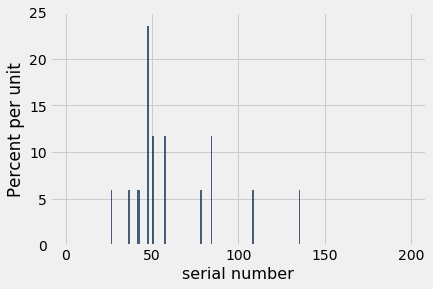

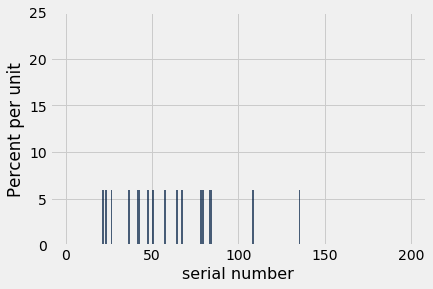

In [11]:
plot_serial_numbers(one_resample)
plot_serial_numbers(observations)

#### Question 2.3
Which of the following are true:
1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. The resample has exactly one copy of each serial number.
4. The sample has exactly one copy of each serial number.

Assign true_statements to a list of the correct statements.

In [12]:
true_statements = [1, 4]

In [13]:
grade('tests/q2_3.py')

#### Question 2.4
Create two more resamples using the function `simulate_resample` from above. For each resampled data, plot it and compute its max- and mean-based estimates.

128.8235294117647
Mean-based estimate for resample 0: None
Max-based estimate for resample 0: 135
106.82352941176471
Mean-based estimate for resample 1: None
Max-based estimate for resample 1: 108


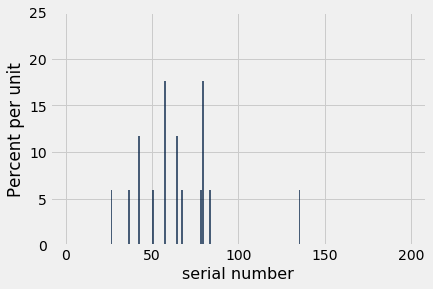

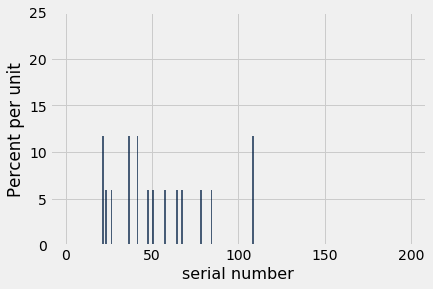

In [14]:
resample_0 = simulate_resample()
plot_serial_numbers(resample_0) 
mean_based_estimate_0 = mean_based_estimator(resample_0.column("serial number")) 
max_based_estimate_0 = max(resample_0.column("serial number")) 
print("Mean-based estimate for resample 0:", mean_based_estimate_0) 
print("Max-based estimate for resample 0:", max_based_estimate_0) 

resample_1 = simulate_resample() 
plot_serial_numbers(resample_1) 
mean_based_estimate_1 = mean_based_estimator(resample_1.column("serial number"))
max_based_estimate_1 = max(resample_1.column("serial number")) 
print("Mean-based estimate for resample 1:", mean_based_estimate_1) 
print("Max-based estimate for resample 1:", max_based_estimate_1)

You may find that the max-based estimates from the resamples are both exactly 135.  You will probably find that the two mean-based estimates do differ from the sample mean-based estimate (and from each other).

#### Question 2.5
Using probability that you've learned, compute the exact chance that a max-based estimate from *one* resample is 135.

Using your intuition, explain why a mean-based estimate from a resample is less often exactly equal to the mean-based estimate from the original sample as compared to a max-based estimate.

As a refresher, here are some rules of probability that may be helpful:

- When all outcomes are equally likely: P(event happens) $=$ $\frac{\text{# outcomes that make event happen}}{\text{# of all outcomes}}$

- When an event can happen in 2 ways: P(event) $=$ P(event happening first way) $+$ P(event happening second way)

- When 2 events must both happen: P(2 events both happen) $=$ P(one event happens) $*$ P(other event happens, given the first one happened)

- When an event doesn't happen: P(event doesn't happen) $=$ 1 $-$ P(event does happen)

- P(at least one success) $= 1 - $ P(no successes)

A resample that includes the greatest value in the sample (135) will have the same max based estimate. Each sample has 17 events so the probability of getting it is 1 - P(don't get 135) = 1 - N-1/N.

Discuss your answers on the edX discussion forums.  If you have difficulty with the probability calculation, ask for help; don't stay stuck on it for too long.

## 3. Simulating with resampling

**Note**: *The last part of this lab is difficult to check automatically, so it will not be graded. We strongly suggest that you try to complete it. We will release solutions to this lab so that you can compare to them.*

Since resampling from a sample is very similar to sampling from a population, the code should look almost the same.  That means we can write a function that simulates either sampling from a population or resampling from a sample.  If we pass it a population as its argument, it will do the former; if we pass it a sample, it will do the latter.

#### Question 3.1
Write a function called `simulate_estimates`.  It should take 4 arguments:
1. A table from which the data should be sampled.  The table will have 1 column named `"serial number"`.
2. The size of each sample from that table, an integer.  (For example, to do resampling, we would pass for this argument the number of rows in the table.)
3. A function that computes a statistic of a sample.  This argument is a *function* that takes an array of serial numbers as its argument and returns a number.
4. The number of replications to perform.

It should simulate many samples with replacement from the given table.  (The number of samples is the 4th argument.)  For each of those samples, it should compute the statistic on that sample. Then it should return an array containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

**Hint**: Your implementation should contain the following line, which extracts the "serial number" column from some table ``t`` and calls the `statistic` function on it, storing the result in the name `s`.

``s = statistic(t.column("serial number"))``

127.44
136.92
127.52
117.48
126.04
136.64
122.76
131.72
130.88
125.28
116.04
128.2
127.76
116.92
115.2
113.04
111.68
128.04
112.0
124.84
133.8
118.64
127.36
116.32
116.68
126.92
121.76
130.08
108.44
126.16
124.04
117.24
119.68
111.0
121.24
124.2
116.44
122.16
122.72
111.84
120.24
128.72
124.8
130.56
121.92
124.0
129.48
124.44
107.88
123.6
119.76
127.12
112.88
123.68
111.52
139.92
131.52
113.52
113.76
127.8
124.16
126.68
104.84
122.6
141.36
121.08
120.52
120.2
120.96
113.52
109.2
131.56
132.12
121.4
120.2
109.8
122.2
138.44
131.4
108.48
127.76
110.04
126.4
118.36
130.48
114.56
120.76
128.52
121.36
122.28
131.56
123.8
121.08
108.6
120.76
129.12
116.36
117.92
117.16
114.88
107.0
108.56
123.2
111.44
114.28
118.68
147.2
121.44
108.0
126.24
137.6
118.6
119.0
133.08
121.08
110.44
118.24
116.56
125.12
121.88
113.28
120.84
126.52
114.68
139.0
127.12
115.76
114.08
135.0
127.04
114.96
129.68
105.84
120.2
119.4
114.88
132.12
122.8
131.52
118.4
125.4
114.32
114.04
112.44
108.04
111.96
123.76
135.96

123.72
129.6
119.88
110.08
115.68
120.32
126.72
120.0
128.84
132.36
112.36
120.32
113.68
123.52
96.24
130.0
104.52
121.52
132.76
119.08
119.44
124.48
124.8
115.24
111.68
117.68
119.04
120.36
117.2
119.52
134.0
138.0
134.68
131.84
134.92
129.52
120.64
124.16
120.92
108.96
109.64
125.56
122.32
118.28
127.72
126.72
129.08
117.16
122.8
126.36
126.56
105.28
110.96
106.72
111.0
129.96
119.64
125.0
110.08
138.72
131.52
126.56
131.52
123.6
119.52
115.36
115.96
114.16
123.48
128.48
117.04
119.52
127.68
116.8
138.4
122.84
120.12
129.36
124.24
126.36
124.16
107.56
116.36
125.64
128.32
118.92
119.56
129.32
114.04
118.64
118.72
126.44
108.76
132.6
132.28
134.56
129.64
136.52
127.24
126.12
117.64
114.72
123.24
134.4
118.64
129.84
111.68
121.64
123.44
114.44
117.88
127.04
119.72
120.08
124.16
115.24
122.24
121.8
129.92
122.52
114.8
113.32
123.6
127.08
121.08
115.4
107.32
125.32
137.44
119.68
117.48
134.08
130.28
135.2
120.96
133.92
103.0
134.04
115.48
128.64
111.76
113.96
115.56
112.04
122.52
118.4
1

124.04
121.0
128.4
121.08
119.96
119.6
137.16
121.88
132.24
121.2
121.12
118.16
114.44
112.48
111.96
134.08
121.84
112.84
116.72
123.0
130.4
117.84
119.48
118.36
120.12
141.6
117.6
114.68
123.12
125.08
129.68
128.12
109.92
118.12
118.52
146.56
123.12
122.88
122.72
126.16
110.24
119.72
126.2
116.04
124.88
130.76
135.08
109.72
108.96
111.92
116.68
128.84
123.8
122.68
130.52
105.92
118.32
120.08
118.36
117.48
123.08
118.52
117.6
109.08
110.8
126.32
118.88
126.0
123.96
113.32
124.24
106.52
111.92
123.6
138.96
107.52
116.16
106.16
115.56
131.2
117.56
132.48
122.36
116.28
131.88
118.52
125.56
133.88
123.68
123.52
107.16
131.56
130.44
125.84
127.0
101.2
138.96
111.16
130.68
140.6
116.68
125.4
119.44
115.8
130.24
119.84
132.64
133.6
114.24
136.88
134.12
129.68
114.52
111.12
129.24
124.92
122.92
124.72
106.36
109.72
115.28
114.84
137.36
97.68
114.6
112.92
114.88
131.52
118.64
116.0
115.16
130.0
110.68
116.4
112.0
128.44
121.08
120.48
125.2
132.16
110.48
124.48
119.2
122.28
129.64
128.6
101.12
1

128.92
125.4
124.12
132.56
118.12
110.68
117.36
115.96
126.92
120.92
111.24
113.72
142.48
129.0
130.92
134.8
125.72
104.56
120.92
114.24
117.32
115.12
118.92
123.4
105.4
125.24
118.68
111.92
120.12
126.16
113.6
123.08
124.0
122.08
127.76
121.04
113.24
122.56
106.28
136.88
129.44
122.76
129.88
117.36
134.4
115.48
115.12
116.68
135.44
120.6
138.0
118.36
125.84
132.0
124.92
115.92
122.88
108.28
125.32
115.2
121.8
109.28
130.4
123.84
129.84
117.56
125.08
128.08
118.16
123.96
117.32
122.4
110.96
121.56
119.12
125.4
127.44
120.36
117.28
129.92
139.36
120.76
124.88
116.04
121.68
116.68
118.96
111.28
123.0
116.8
125.88
128.52
110.48
119.08
122.64
129.32
116.84
136.04
121.0
121.92
124.88
111.96
115.32
110.2
118.36
116.36
121.12
116.48
102.76
125.36
101.44
130.12
114.44
131.32
114.8
120.64
118.88
127.8
103.0
118.68
124.12
128.2
119.12
114.52
122.72
118.16
136.04
122.24
114.32
124.72
117.2
126.24
113.76
120.08
117.52
113.32
118.8
104.32
124.72
117.84
129.6
124.8
118.96
125.0
134.88
131.92
114.72


133.52
117.28
128.0
107.68
117.12
107.6
130.56
118.4
132.96
121.44
137.2
136.64
119.68
103.68
121.88
130.08
124.2
117.08
115.6
108.2
130.16
131.84
120.92
119.08
116.68
134.0
124.0
120.88
141.52
131.8
120.16
119.6
122.72
110.56
109.8
126.68
115.96
114.0
128.32
140.44
111.72
110.0
105.8
117.68
119.24
116.52
124.8
133.32
114.28
117.56
124.08
116.52
128.16
123.92
126.72
122.4
115.12
119.4
125.4
109.4
126.6
124.96
132.36
109.8
100.16
119.6
136.32
129.2
110.64
121.88
121.84
122.52
118.84
129.96
132.68
123.6
129.8
136.12
110.48
118.68
123.08
110.08
115.04
122.76
124.2
118.2
128.24
137.92
132.76
129.16
131.08
109.64
130.84
104.48
118.72
128.16
137.0
110.84
134.72
124.8
126.36
131.96
119.8
132.64
128.08
134.2
127.64
119.96
132.32
124.04
118.16
124.36
129.92
118.24
128.8
130.12
133.12
104.88
141.2
102.36
120.52
122.04
122.56
127.28
113.0
115.48
110.04
130.48
123.6
122.56
117.04
113.4
116.0
118.4
113.36
120.16
133.76
122.12
116.04
120.0
119.12
111.0
128.88
117.52
118.04
118.56
125.04
119.88
120.3

135.4
126.44
134.8
129.72
118.16
127.24
128.32
126.68
117.48
130.48
117.32
132.2
122.4
120.8
116.48
119.56
129.04
131.76
118.28
136.24
133.92
118.2
130.08
107.32
116.84
126.52
123.56
115.52
111.2
107.24
128.64
116.92
130.0
128.6
123.88
115.6
118.08
120.92
127.96
121.88
129.04
122.72
128.56
126.4
104.48
126.32
112.56
141.72
123.8
121.36
117.44
114.16
124.68
118.8
117.28
102.4
111.52
121.52
113.28
118.64
137.4
134.96
122.44
120.08
112.64
129.16
116.52
123.44
130.12
103.96
130.16
128.08
118.36
113.0
118.56
114.04
107.56
124.28
117.64
116.28
115.72
120.04
117.96
127.44
125.32
120.32
118.96
131.08
123.96
132.04
113.4
126.68
130.12
115.52
121.16
118.44
118.4
127.76
127.2
112.08
129.64
122.2
129.24
120.24
117.0
117.36
130.28
124.92
120.8
127.36
128.76
135.48
124.08
107.08
110.4
142.96
122.48
118.36
105.44
118.88
136.56
129.88
118.88
119.88
128.16
134.0
127.72
109.24
118.4
131.96
134.64
139.68
121.72
139.28
122.92
113.92
113.52
123.28
114.44
95.68
131.44
120.32
118.8
125.88
125.48
137.16
126.8

120.32
125.52
120.96
136.88
111.48
121.32
123.92
109.0
127.72
133.08
116.64
137.84
134.0
129.28
139.64
124.08
136.16
129.08
130.04
118.4
122.96
124.48
117.52
121.6
120.84
112.0
129.52
136.6
116.24
108.32
124.4
129.88
124.32
121.92
138.72
116.36
122.32
124.88
131.48
108.44
119.96
125.44
107.6
116.84
114.92
115.64
130.16
131.4
120.4
128.08
122.88
132.68
114.96
121.96
133.56
118.88
108.92
117.6
128.52
116.08
125.56
141.72
121.96
121.36
128.92
136.24
104.96
122.68
132.6
126.76
121.96
114.48
130.24
139.6
122.6
120.6
120.48
110.6
117.8
123.64
123.52
119.08
132.92
125.84
113.8
128.84
105.92
122.36
151.84
110.08
131.24
121.12
119.16
127.2
132.36
114.72
115.76
110.64
116.28
116.04
120.16
115.32
119.56
126.88
111.48
133.52
131.96
111.08
118.48
112.16
125.96
116.0
139.28
129.6
115.28
115.32
124.64
126.56
126.48
117.48
140.08
130.72
125.6
114.48
119.6
116.8
133.12
117.0
120.68
128.92
114.84
127.8
119.52
121.68
121.24
123.92
129.08
131.28
112.08
127.2
126.48
121.0
130.64
120.28
128.0
136.2
112.84
1

131.84
126.08
121.36
117.08
123.52
140.64
110.36
115.8
116.52
116.52
112.88
109.48
116.04
121.6
123.2
131.8
133.2
128.84
124.4
121.44
125.28
115.36
105.44
139.76
132.12
132.04
121.0
129.16
118.24
112.28
122.84
126.0
132.92
110.16
132.6
132.56
128.28
111.6
132.2
113.96
131.68
117.16
130.6
114.0
129.44
140.44
123.08
131.24
142.64
118.08
123.48
127.52
134.12
120.8
125.0
111.48
114.84
132.64
143.36
142.36
122.8
136.96
113.12
125.0
117.92
119.28
128.24
133.88
118.72
105.08
124.72
134.84
120.96
130.04
121.6
130.6
123.56
112.16
122.48
119.28
122.36
108.44
135.08
108.68
118.72
142.76
119.44
121.0
112.88
123.96
119.6
125.28
112.68
114.52
130.64
118.88
123.16
127.84
107.92
116.4
119.56
117.92
127.68
129.16
132.64
134.68
124.56
138.04
113.24
124.6
119.96
130.8
125.88
131.8
123.12
105.16
115.6
123.8
131.92
118.08
116.92
122.88
139.08
131.36
121.96
132.12
120.96
119.76
129.8
128.64
109.96
132.92
127.68
129.2
116.0
111.28
127.2
117.72
115.24
108.64
129.68
137.72
130.04
116.72
136.28
113.08
122.4
117

ValueError: color kwarg must have one color per dataset

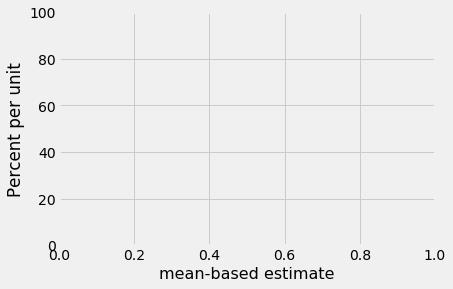

In [21]:
def simulate_estimates(original_table, sample_size, statistic, num_replications):
    # Our implementation of this function took 5 short lines of code.
    stats = make_array
    for i in np.arange(num_replications):
        s = statistic(observations.sample(sample_size).column('serial number'))
        stats = np.append(stats,s)
    return stats

# This should generate an empirical histogram of twice-mean estimates
# of N from samples of size 50 if N is 1000.  This should be a bell-shaped
# curve centered at 1000 with most of its mass in [800, 1200].  To verify your
# answer, make sure that's what you see!
example_estimates = simulate_estimates(
    Table().with_column("serial number", np.arange(1, 1000+1)),
    50,
    mean_based_estimator,
    10000)
Table().with_column("mean-based estimate", example_estimates).hist(bins=np.arange(0, 1500, 25))

Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

#### Question 3.2
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean-based estimates* of `N`.  Use 5,000 replications.  
We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

112.11764705882354
138.58823529411765
120.23529411764706
117.29411764705883
124.0
102.23529411764706
135.41176470588235
105.6470588235294
105.88235294117646
89.17647058823529
133.76470588235293
126.3529411764706
126.23529411764706
130.47058823529412
108.82352941176471
127.88235294117646
148.11764705882354
113.6470588235294
103.41176470588235
123.05882352941177
120.23529411764706
114.70588235294117
119.52941176470588
122.11764705882354
133.88235294117646
138.7058823529412
114.3529411764706
117.6470588235294
126.94117647058823
117.52941176470588
99.76470588235294
127.6470588235294
122.82352941176471
138.7058823529412
99.05882352941177
120.0
140.94117647058823
108.82352941176471
99.17647058823529
130.7058823529412
118.3529411764706
139.41176470588235
110.82352941176471
134.7058823529412
138.7058823529412
98.0
139.1764705882353
110.58823529411765
118.11764705882354
121.6470588235294
108.3529411764706
117.76470588235294
114.70588235294117
106.94117647058823
133.2941176470588
156.70588235294

142.8235294117647
104.58823529411765
130.8235294117647
95.29411764705883
102.94117647058823
113.6470588235294
116.47058823529412
126.82352941176471
133.64705882352942
113.76470588235294
141.1764705882353
119.76470588235294
119.17647058823529
145.52941176470588
136.0
111.17647058823529
124.0
127.52941176470588
146.35294117647058
108.11764705882354
139.64705882352942
118.58823529411765
128.23529411764707
91.05882352941177
149.2941176470588
93.52941176470588
98.3529411764706
131.1764705882353
109.76470588235294
145.52941176470588
137.2941176470588
116.82352941176471
120.23529411764706
128.0
106.11764705882354
100.0
116.94117647058823
106.82352941176471
108.3529411764706
128.8235294117647
112.94117647058823
97.88235294117646
115.05882352941177
106.11764705882354
127.41176470588235
137.1764705882353
108.82352941176471
145.1764705882353
119.29411764705883
110.0
91.41176470588235
124.11764705882354
119.17647058823529
126.70588235294117
116.58823529411765
115.52941176470588
117.52941176470588


151.41176470588235
113.05882352941177
112.0
117.17647058823529
107.76470588235294
113.76470588235294
126.70588235294117
110.94117647058823
121.29411764705883
120.70588235294117
122.3529411764706
129.88235294117646
131.05882352941177
122.3529411764706
122.0
110.82352941176471
113.41176470588235
125.6470588235294
125.41176470588235
139.1764705882353
118.23529411764706
116.3529411764706
111.17647058823529
103.29411764705883
132.47058823529412
132.11764705882354
112.11764705882354
112.0
120.11764705882354
132.0
133.1764705882353
144.11764705882354
127.88235294117646
133.88235294117646
130.23529411764707
99.17647058823529
137.64705882352942
125.52941176470588
123.29411764705883
101.6470588235294
139.1764705882353
124.47058823529412
149.76470588235293
124.82352941176471
127.41176470588235
106.82352941176471
110.11764705882354
99.88235294117646
130.35294117647058
130.7058823529412
117.52941176470588
106.3529411764706
115.29411764705883
109.29411764705883
111.41176470588235
125.41176470588235


104.0
117.6470588235294
145.76470588235293
120.58823529411765
89.88235294117646
128.0
122.58823529411765
127.17647058823529
98.82352941176471
116.11764705882354
137.64705882352942
90.70588235294117
98.23529411764706
103.29411764705883
99.29411764705883
131.76470588235293
118.3529411764706
122.47058823529412
118.3529411764706
131.76470588235293
142.35294117647058
106.11764705882354
123.88235294117646
107.05882352941177
113.17647058823529
122.0
126.70588235294117
101.88235294117646
129.41176470588235
112.82352941176471
154.7058823529412
133.05882352941177
99.29411764705883
129.76470588235293
112.94117647058823
126.3529411764706
111.05882352941177
132.11764705882354
110.82352941176471
120.94117647058823
139.1764705882353
116.58823529411765
93.6470588235294
129.76470588235293
114.94117647058823
128.11764705882354
117.76470588235294
123.6470588235294
110.70588235294117
131.52941176470588
143.1764705882353
123.76470588235294
134.8235294117647
123.88235294117646
114.70588235294117
137.0588235

151.76470588235293
131.2941176470588
116.70588235294117
95.29411764705883
116.47058823529412
123.76470588235294
127.17647058823529
112.82352941176471
95.41176470588235
133.88235294117646
124.58823529411765
98.58823529411765
138.47058823529412
133.05882352941177
120.47058823529412
110.3529411764706
136.7058823529412
117.6470588235294
122.11764705882354
122.47058823529412
133.05882352941177
108.0
142.0
129.41176470588235
110.3529411764706
96.70588235294117
117.41176470588235
150.94117647058823
146.0
113.76470588235294
117.6470588235294
119.29411764705883
133.88235294117646
115.6470588235294
126.0
152.11764705882354
118.70588235294117
117.52941176470588
127.29411764705883
121.05882352941177
115.29411764705883
162.35294117647058
124.47058823529412
123.41176470588235
120.47058823529412
130.47058823529412
114.11764705882354
104.58823529411765
110.70588235294117
97.17647058823529
142.11764705882354
150.0
110.0
115.52941176470588
117.76470588235294
100.58823529411765
106.47058823529412
138.588

110.47058823529412
134.47058823529412
131.1764705882353
106.0
140.8235294117647
142.8235294117647
104.58823529411765
106.3529411764706
134.58823529411765
115.76470588235294
102.94117647058823
133.64705882352942
122.82352941176471
123.05882352941177
104.23529411764706
104.94117647058823
119.6470588235294
125.76470588235294
112.94117647058823
118.58823529411765
107.05882352941177
117.6470588235294
131.05882352941177
118.47058823529412
96.23529411764706
142.47058823529412
117.88235294117646
130.7058823529412
134.94117647058823
127.76470588235294
119.88235294117646
137.2941176470588
141.2941176470588
143.64705882352942
140.58823529411765
147.05882352941177
109.52941176470588
112.3529411764706
97.29411764705883
123.05882352941177
121.17647058823529
131.88235294117646
109.29411764705883
97.29411764705883
112.3529411764706
110.47058823529412
124.94117647058823
124.0
116.58823529411765
132.94117647058823
122.3529411764706
114.70588235294117
126.3529411764706
124.0
136.0
109.6470588235294
103.0

109.88235294117646
135.1764705882353
120.82352941176471
117.29411764705883
135.52941176470588
104.82352941176471
119.6470588235294
103.41176470588235
107.88235294117646
100.23529411764706
122.11764705882354
120.82352941176471
115.17647058823529
124.23529411764706
116.82352941176471
152.47058823529412
112.11764705882354
104.11764705882354
126.94117647058823
144.58823529411765
123.6470588235294
157.64705882352942
120.3529411764706
140.58823529411765
102.3529411764706
101.52941176470588
116.70588235294117
120.11764705882354
136.94117647058823
124.70588235294117
93.17647058823529
136.23529411764707
116.0
133.05882352941177
106.0
118.94117647058823
109.05882352941177
98.58823529411765
137.41176470588235
114.70588235294117
123.88235294117646
136.11764705882354
139.41176470588235
130.94117647058823
94.23529411764706
106.0
99.17647058823529
112.94117647058823
137.88235294117646
125.76470588235294
86.70588235294117
110.82352941176471
104.11764705882354
143.52941176470588
117.88235294117646
128.

140.11764705882354
146.35294117647058
135.64705882352942
112.94117647058823
122.23529411764706
90.94117647058823
122.3529411764706
120.47058823529412
126.0
117.41176470588235
138.7058823529412
145.76470588235293
141.64705882352942
102.58823529411765
127.41176470588235
131.41176470588235
132.11764705882354
118.3529411764706
142.35294117647058
102.3529411764706
112.11764705882354
104.23529411764706
131.88235294117646
140.7058823529412
106.70588235294117
107.05882352941177
90.0
111.41176470588235
121.88235294117646
116.58823529411765
105.17647058823529
115.29411764705883
123.88235294117646
121.17647058823529
113.17647058823529
110.23529411764706
106.82352941176471
126.0
109.76470588235294
103.05882352941177
109.29411764705883
122.3529411764706
151.76470588235293
114.82352941176471
120.3529411764706
108.58823529411765
96.3529411764706
129.88235294117646
105.29411764705883
122.3529411764706
125.6470588235294
133.1764705882353
119.29411764705883
98.11764705882354
123.76470588235294
122.23529

117.52941176470588
102.58823529411765
109.52941176470588
117.17647058823529
118.0
122.11764705882354
132.0
134.7058823529412
129.41176470588235
144.47058823529412
127.6470588235294
126.3529411764706
129.76470588235293
134.94117647058823
120.11764705882354
133.41176470588235
100.58823529411765
125.41176470588235
90.82352941176471
128.0
128.8235294117647
128.7058823529412
130.11764705882354
110.94117647058823
151.76470588235293
117.76470588235294
119.29411764705883
120.23529411764706
108.82352941176471
141.1764705882353
116.11764705882354
139.2941176470588
122.70588235294117
87.6470588235294
123.05882352941177
159.1764705882353
129.05882352941177
134.58823529411765
114.47058823529412
136.94117647058823
125.52941176470588
100.82352941176471
102.23529411764706
97.17647058823529
140.23529411764707
136.47058823529412
134.58823529411765
105.52941176470588
139.05882352941177
162.47058823529412
105.6470588235294
106.0
137.2941176470588
137.76470588235293
108.82352941176471
124.47058823529412
11

105.76470588235294
116.3529411764706
129.88235294117646
142.35294117647058
124.70588235294117
134.8235294117647
113.88235294117646
116.23529411764706
101.41176470588235
110.3529411764706
128.47058823529412
139.64705882352942
112.23529411764706
133.76470588235293
145.41176470588235
111.05882352941177
119.76470588235294
134.0
122.3529411764706
115.29411764705883
132.58823529411765
145.05882352941177
145.2941176470588
114.23529411764706
107.88235294117646
105.76470588235294
122.47058823529412
120.3529411764706
117.05882352941177
134.35294117647058
118.11764705882354
120.70588235294117
111.88235294117646
138.23529411764707
126.0
123.6470588235294
106.58823529411765
79.6470588235294
101.41176470588235
116.23529411764706
136.0
108.0
147.64705882352942
125.29411764705883
128.11764705882354
118.0
119.05882352941177
132.47058823529412
103.88235294117646
116.70588235294117
150.23529411764707
151.76470588235293
98.47058823529412
106.0
168.94117647058823
133.64705882352942
137.76470588235293
123.6

ValueError: color kwarg must have one color per dataset

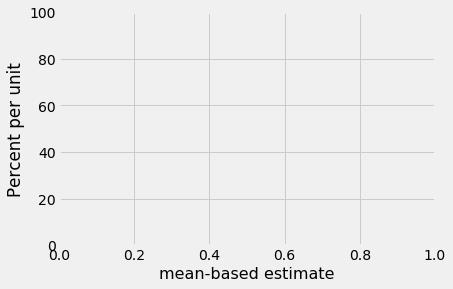

In [28]:
bootstrap_estimates = simulate_estimates(observations,num_observations,mean_based_estimator,5000)
test = Table().with_column("mean-based estimate", bootstrap_estimates)
test.hist(bins=np.arange(0, 100, 4)) 

#### Question 3.3
Compute an interval that covers the middle 95% of the bootstrap estimates.  Verify that your interval looks like it covers 95% of the area in the histogram above.

In [ ]:
left_end = percentile(2.5, bootstrap_estimates)
right_end = percentile(97.5, bootstrap_estimates)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]")#.format(left_end, right_end))

#### Question 3.4
Your mean-based estimate of `N` should have been around 122. Given the above calculations, is it likely that `N` is exactly 122? If not, what is the typical range of values of the mean-based estimates of `N` for samples of size 17?

*Write your answer here, replacing this text.*

Check your solutions with someone on the edX discussion forums

#### Question 3.5
`N` was actually 150!  Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations by sampling from the population table we have created for you below. 
2. Compute an estimate of `N` from these new observations, using `mean_based_estimator`.
3. Using only the new observations, compute 5,000 bootstrap estimates of `N`.
4. Plot these bootstrap estimates and compute an interval covering the middle 95%.

127.29411764705883
112.23529411764706
123.05882352941177
117.88235294117646
107.17647058823529
103.41176470588235
132.7058823529412
142.94117647058823
142.8235294117647
167.1764705882353
109.05882352941177
128.23529411764707
120.11764705882354
110.82352941176471
98.3529411764706
118.23529411764706
120.3529411764706
123.29411764705883
118.0
117.05882352941177
105.76470588235294
136.47058823529412
117.05882352941177
144.58823529411765
114.0
103.05882352941177
115.76470588235294
119.05882352941177
140.47058823529412
130.47058823529412
128.7058823529412
100.58823529411765
152.94117647058823
100.23529411764706
147.1764705882353
131.52941176470588
130.8235294117647
121.41176470588235
133.52941176470588
134.11764705882354
153.05882352941177
107.17647058823529
110.3529411764706
112.70588235294117
123.88235294117646
127.52941176470588
126.70588235294117
151.76470588235293
133.64705882352942
121.88235294117646
146.47058823529412
132.23529411764707
117.17647058823529
135.52941176470588
94.5882352

138.0
109.05882352941177
163.76470588235293
110.11764705882354
159.88235294117646
126.58823529411765
107.76470588235294
115.41176470588235
124.0
106.82352941176471
136.47058823529412
120.3529411764706
98.47058823529412
118.23529411764706
106.58823529411765
116.82352941176471
124.70588235294117
133.64705882352942
114.94117647058823
131.64705882352942
109.6470588235294
132.47058823529412
111.41176470588235
120.70588235294117
134.11764705882354
114.47058823529412
112.82352941176471
149.88235294117646
126.23529411764706
103.05882352941177
122.94117647058823
124.0
104.82352941176471
103.52941176470588
92.23529411764706
104.3529411764706
121.17647058823529
134.7058823529412
116.47058823529412
139.64705882352942
120.11764705882354
108.58823529411765
137.1764705882353
103.76470588235294
118.0
107.05882352941177
127.29411764705883
123.52941176470588
122.70588235294117
110.82352941176471
102.94117647058823
131.1764705882353
126.3529411764706
127.76470588235294
129.76470588235293
94.1176470588235

116.47058823529412
114.58823529411765
128.47058823529412
136.94117647058823
123.05882352941177
146.0
136.7058823529412
125.6470588235294
120.3529411764706
110.70588235294117
130.23529411764707
107.05882352941177
136.7058823529412
118.0
108.11764705882354
108.11764705882354
128.58823529411765
121.05882352941177
112.47058823529412
114.47058823529412
122.70588235294117
91.52941176470588
122.94117647058823
111.76470588235294
111.05882352941177
168.58823529411765
118.11764705882354
117.41176470588235
128.11764705882354
121.17647058823529
116.0
119.76470588235294
140.35294117647058
123.76470588235294
106.0
135.64705882352942
97.17647058823529
137.2941176470588
120.58823529411765
111.05882352941177
131.41176470588235
129.64705882352942
154.7058823529412
114.58823529411765
120.23529411764706
103.88235294117646
117.52941176470588
114.70588235294117
111.76470588235294
120.23529411764706
113.05882352941177
104.11764705882354
115.41176470588235
136.94117647058823
119.05882352941177
94.235294117647

106.23529411764706
144.94117647058823
119.52941176470588
113.05882352941177
138.35294117647058
108.3529411764706
149.05882352941177
120.3529411764706
123.52941176470588
116.0
117.76470588235294
135.64705882352942
141.88235294117646
124.82352941176471
145.64705882352942
105.29411764705883
130.23529411764707
135.76470588235293
115.05882352941177
116.0
122.11764705882354
128.35294117647058
116.23529411764706
123.17647058823529
138.23529411764707
115.76470588235294
106.11764705882354
119.17647058823529
143.52941176470588
102.58823529411765
151.52941176470588
120.3529411764706
97.05882352941177
125.05882352941177
147.1764705882353
124.47058823529412
167.64705882352942
108.47058823529412
110.94117647058823
122.47058823529412
131.41176470588235
103.6470588235294
118.11764705882354
122.0
116.47058823529412
116.23529411764706
127.76470588235294
94.47058823529412
145.52941176470588
145.64705882352942
139.64705882352942
121.41176470588235
140.23529411764707
131.88235294117646
120.70588235294117
1

108.82352941176471
124.94117647058823
103.17647058823529
118.58823529411765
118.23529411764706
125.88235294117646
134.8235294117647
115.41176470588235
107.6470588235294
109.05882352941177
130.47058823529412
140.0
153.1764705882353
115.17647058823529
138.7058823529412
118.70588235294117
117.05882352941177
110.47058823529412
96.58823529411765
107.41176470588235
162.47058823529412
136.58823529411765
123.41176470588235
137.52941176470588
127.29411764705883
106.11764705882354
107.6470588235294
120.82352941176471
133.52941176470588
110.47058823529412
116.70588235294117
132.58823529411765
120.82352941176471
108.47058823529412
143.1764705882353
144.35294117647058
131.1764705882353
154.94117647058823
113.41176470588235
123.41176470588235
112.3529411764706
132.94117647058823
122.3529411764706
94.94117647058823
117.88235294117646
127.88235294117646
118.70588235294117
120.70588235294117
121.41176470588235
132.11764705882354
116.58823529411765
150.94117647058823
102.70588235294117
100.1176470588235

124.23529411764706
93.29411764705883
154.35294117647058
133.52941176470588
127.41176470588235
122.47058823529412
124.70588235294117
128.35294117647058
131.41176470588235
128.58823529411765
112.0
111.52941176470588
138.8235294117647
128.8235294117647
131.64705882352942
124.23529411764706
105.05882352941177
117.41176470588235
128.35294117647058
121.88235294117646
150.23529411764707
130.35294117647058
128.7058823529412
116.47058823529412
124.0
132.35294117647058
124.0
116.94117647058823
117.05882352941177
114.94117647058823
111.6470588235294
113.29411764705883
141.76470588235293
98.11764705882354
126.70588235294117
119.41176470588235
114.82352941176471
144.94117647058823
105.76470588235294
125.76470588235294
127.52941176470588
128.58823529411765
118.47058823529412
132.58823529411765
122.94117647058823
108.11764705882354
125.17647058823529
100.11764705882354
121.88235294117646
106.82352941176471
88.23529411764706
132.8235294117647
132.47058823529412
126.0
114.23529411764706
139.41176470588

121.41176470588235
107.76470588235294
131.05882352941177
136.35294117647058
106.3529411764706
123.29411764705883
136.58823529411765
130.8235294117647
125.41176470588235
129.64705882352942
126.94117647058823
134.47058823529412
124.11764705882354
151.76470588235293
123.76470588235294
143.52941176470588
129.1764705882353
116.70588235294117
104.23529411764706
143.52941176470588
152.35294117647058
137.1764705882353
130.94117647058823
117.6470588235294
130.7058823529412
120.3529411764706
122.11764705882354
127.76470588235294
122.0
133.52941176470588
134.47058823529412
131.64705882352942
112.23529411764706
138.0
124.23529411764706
150.8235294117647
98.82352941176471
131.2941176470588
103.88235294117646
127.52941176470588
112.23529411764706
106.70588235294117
129.64705882352942
117.76470588235294
112.82352941176471
124.58823529411765
111.29411764705883
131.05882352941177
124.94117647058823
134.94117647058823
142.8235294117647
81.76470588235294
98.94117647058823
119.52941176470588
130.470588235

116.11764705882354
114.70588235294117
86.82352941176471
147.52941176470588
117.88235294117646
138.8235294117647
113.76470588235294
133.05882352941177
120.11764705882354
88.47058823529412
142.47058823529412
119.6470588235294
124.82352941176471
120.94117647058823
140.11764705882354
125.05882352941177
143.76470588235293
108.23529411764706
126.23529411764706
112.58823529411765
123.29411764705883
141.88235294117646
117.76470588235294
106.23529411764706
112.3529411764706
129.2941176470588
155.76470588235293
107.41176470588235
126.11764705882354
110.23529411764706
138.58823529411765
136.94117647058823
133.05882352941177
111.52941176470588
123.88235294117646
118.47058823529412
123.76470588235294
151.41176470588235
130.23529411764707
104.70588235294117
120.70588235294117
110.23529411764706
121.52941176470588
121.52941176470588
135.41176470588235
98.0
134.8235294117647
118.23529411764706
131.76470588235293
130.0
108.23529411764706
117.52941176470588
157.1764705882353
99.29411764705883
114.352941

131.76470588235293
122.70588235294117
99.17647058823529
117.52941176470588
126.0
124.47058823529412
131.1764705882353
129.1764705882353
147.88235294117646
126.82352941176471
98.82352941176471
95.41176470588235
133.76470588235293
110.11764705882354
118.3529411764706
117.52941176470588
153.05882352941177
130.58823529411765
133.64705882352942
122.47058823529412
161.76470588235293
125.17647058823529
132.11764705882354
136.11764705882354
131.05882352941177
126.82352941176471
116.23529411764706
128.58823529411765
98.11764705882354
124.70588235294117
128.23529411764707
138.0
118.70588235294117
126.0
141.1764705882353
125.05882352941177
111.41176470588235
124.3529411764706
137.41176470588235
126.47058823529412
122.0
114.94117647058823
121.17647058823529
144.47058823529412
124.11764705882354
94.3529411764706
136.58823529411765
129.05882352941177
113.41176470588235
117.52941176470588
123.76470588235294
118.82352941176471
113.05882352941177
106.94117647058823
131.05882352941177
156.58823529411765

131.76470588235293
146.35294117647058
125.52941176470588
114.23529411764706
114.11764705882354
103.41176470588235
117.17647058823529
109.41176470588235
134.23529411764707
123.6470588235294
108.23529411764706
126.47058823529412
122.82352941176471
136.8235294117647
102.3529411764706
108.0
116.0
128.58823529411765
129.2941176470588
135.41176470588235
126.58823529411765
129.64705882352942
124.0
111.52941176470588
128.47058823529412
156.58823529411765
111.6470588235294
123.52941176470588
155.88235294117646
122.70588235294117
123.76470588235294
110.70588235294117
90.47058823529412
139.64705882352942
106.0
119.88235294117646
124.3529411764706
141.64705882352942
132.8235294117647
102.23529411764706
116.47058823529412
104.94117647058823
100.23529411764706
91.05882352941177
129.76470588235293
110.82352941176471
98.0
154.23529411764707
117.41176470588235
131.41176470588235
146.58823529411765
128.11764705882354
114.82352941176471
123.76470588235294
126.58823529411765
117.41176470588235
142.7058823

103.17647058823529
93.05882352941177
99.88235294117646
139.64705882352942
135.76470588235293
128.94117647058823
122.82352941176471
129.88235294117646
141.1764705882353
138.11764705882354
124.3529411764706
115.52941176470588
101.52941176470588
99.6470588235294
128.47058823529412
117.29411764705883
128.94117647058823
104.58823529411765
119.29411764705883
112.70588235294117
142.94117647058823
115.88235294117646
105.41176470588235
130.47058823529412
128.8235294117647
117.29411764705883
112.58823529411765
146.47058823529412
124.94117647058823
131.41176470588235
132.11764705882354
114.47058823529412
110.82352941176471
131.1764705882353
123.88235294117646
105.88235294117646
148.35294117647058
121.76470588235294
114.82352941176471
133.2941176470588
130.94117647058823
123.29411764705883
125.76470588235294
122.82352941176471
102.82352941176471
122.94117647058823
108.94117647058823
129.05882352941177
112.0
140.35294117647058
113.05882352941177
127.17647058823529
144.23529411764707
115.05882352941

101.52941176470588
105.52941176470588
122.82352941176471
99.05882352941177
96.11764705882354
116.82352941176471
118.47058823529412
125.29411764705883
120.11764705882354
110.82352941176471
150.94117647058823
131.64705882352942
115.52941176470588
127.6470588235294
107.6470588235294
138.11764705882354
133.64705882352942
140.58823529411765
120.23529411764706
122.3529411764706
127.52941176470588
107.76470588235294
114.82352941176471
103.17647058823529
123.76470588235294
135.2941176470588
114.58823529411765
111.17647058823529
109.41176470588235
120.0
118.0
137.64705882352942
131.2941176470588
112.70588235294117
137.1764705882353
116.47058823529412
101.17647058823529
133.1764705882353
129.76470588235293
120.94117647058823
115.6470588235294
120.11764705882354
136.7058823529412
136.7058823529412
141.2941176470588
122.82352941176471
111.88235294117646
128.11764705882354
110.47058823529412
122.11764705882354
113.29411764705883
124.82352941176471
122.94117647058823
128.0
109.6470588235294
114.0
10

118.58823529411765
116.3529411764706
112.47058823529412
104.58823529411765
150.58823529411765
120.82352941176471
127.05882352941177
124.58823529411765
126.70588235294117
106.94117647058823
128.94117647058823
135.52941176470588
124.82352941176471
117.05882352941177
142.0
99.6470588235294
110.82352941176471
131.52941176470588
141.88235294117646
148.58823529411765
138.0
108.11764705882354
100.94117647058823
117.52941176470588
118.70588235294117
93.76470588235294
104.3529411764706
153.2941176470588
106.47058823529412
124.3529411764706
126.47058823529412
137.52941176470588
138.7058823529412
112.11764705882354
104.23529411764706
105.05882352941177
113.52941176470588
138.58823529411765
123.05882352941177
156.35294117647058
116.11764705882354
132.8235294117647
132.47058823529412
118.94117647058823
123.41176470588235
116.58823529411765
111.88235294117646
100.23529411764706
98.3529411764706
105.41176470588235
119.17647058823529
145.64705882352942
133.64705882352942
119.52941176470588
150.1176470

120.82352941176471
114.94117647058823
141.88235294117646
156.94117647058823
155.41176470588235
154.94117647058823
106.47058823529412
118.70588235294117
130.8235294117647
133.52941176470588
117.52941176470588
126.94117647058823
111.52941176470588
109.05882352941177
118.47058823529412
118.82352941176471
134.23529411764707
142.35294117647058
117.52941176470588
132.8235294117647
117.76470588235294
94.23529411764706
125.05882352941177
108.58823529411765
119.41176470588235
154.0
111.88235294117646
144.11764705882354
100.47058823529412
126.3529411764706
116.94117647058823
153.05882352941177
119.52941176470588
109.41176470588235
118.82352941176471
111.6470588235294
114.47058823529412
126.58823529411765
119.05882352941177
115.88235294117646
137.88235294117646
121.17647058823529
136.23529411764707
119.17647058823529
100.0
123.6470588235294
133.1764705882353
119.88235294117646
120.11764705882354
122.94117647058823
130.47058823529412
134.47058823529412
112.23529411764706
137.76470588235293
113.058

95.52941176470588
115.52941176470588
140.35294117647058
131.76470588235293
127.76470588235294
150.94117647058823
101.76470588235294
124.94117647058823
115.41176470588235
115.17647058823529
147.88235294117646
123.41176470588235
127.41176470588235
111.29411764705883
130.58823529411765
131.1764705882353
128.94117647058823
112.58823529411765
113.88235294117646
140.0
112.47058823529412
126.94117647058823
123.29411764705883
130.23529411764707
124.70588235294117
119.29411764705883
99.41176470588235
100.3529411764706
82.82352941176471
115.05882352941177
126.94117647058823
116.58823529411765
110.70588235294117
148.0
113.52941176470588
117.05882352941177
117.29411764705883
102.47058823529412
108.58823529411765
119.88235294117646
139.76470588235293
117.88235294117646
108.94117647058823
131.88235294117646
134.35294117647058
130.94117647058823
137.52941176470588
121.05882352941177
145.05882352941177
153.52941176470588
116.82352941176471
126.0
106.23529411764706
151.52941176470588
139.76470588235293

129.41176470588235
118.70588235294117
127.17647058823529
121.41176470588235
95.76470588235294
107.52941176470588
107.29411764705883
117.17647058823529
106.82352941176471
138.11764705882354
128.23529411764707
127.05882352941177
138.94117647058823
132.23529411764707
119.88235294117646
104.58823529411765
137.76470588235293
147.41176470588235
117.17647058823529
172.0
110.3529411764706
135.05882352941177
132.0
122.70588235294117
121.05882352941177
127.17647058823529
112.0
136.58823529411765
98.58823529411765
130.8235294117647
153.52941176470588
120.23529411764706
146.94117647058823
134.11764705882354
119.29411764705883
116.47058823529412
102.94117647058823
126.82352941176471
103.41176470588235
112.3529411764706
131.64705882352942
114.47058823529412
137.05882352941177
120.3529411764706
134.8235294117647
121.6470588235294
137.2941176470588
125.76470588235294
123.88235294117646
123.41176470588235
128.0
101.41176470588235
141.2941176470588
115.05882352941177
90.70588235294117
150.0
105.76470588

106.11764705882354
100.94117647058823
106.47058823529412
100.58823529411765
93.29411764705883
123.17647058823529
105.6470588235294
103.6470588235294
124.70588235294117
125.05882352941177
110.70588235294117
125.17647058823529
155.41176470588235
114.11764705882354
127.05882352941177
122.58823529411765
127.05882352941177
119.76470588235294
123.17647058823529
121.88235294117646
124.0
97.41176470588235
131.1764705882353
110.82352941176471
120.94117647058823
122.11764705882354
141.1764705882353
135.88235294117646
99.76470588235294
116.11764705882354
121.17647058823529
149.05882352941177
141.41176470588235
167.2941176470588
138.23529411764707
129.05882352941177
136.23529411764707
96.94117647058823
100.11764705882354
122.3529411764706
123.88235294117646
116.70588235294117
123.52941176470588
112.94117647058823
126.70588235294117
128.11764705882354
122.94117647058823
123.88235294117646
139.64705882352942
89.76470588235294
94.70588235294117
112.0
124.82352941176471
123.76470588235294
138.23529411

ValueError: color kwarg must have one color per dataset

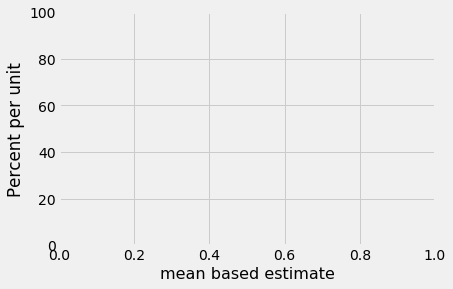

In [29]:
population = Table().with_column("serial number", np.arange(1, 150+1))

new_observations = population.sample(num_observations)
new_mean_based_estimate = simulate_estimates(new_observations,num_observations,mean_based_estimator,5000)
new_bootstrap_estimates = simulate_estimates(new_observations,num_observations,mean_based_estimator,5000)
Table().with_column('mean based estimate', new_bootstrap_estimates).hist(bins=np.arange(0,252,4))
new_left_end = percentile(2.5, new_bootstrap_estimates)
new_right_end = percentile(97.5, new_bootstrap_estimates)

print("New mean-based estimate: {:f}".format(new_mean_based_estimate))
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(new_left_end, new_right_end))

#### Question 3.6
Does the interval covering the middle 95% of the new bootstrap estimates include `N`?  If you ran that cell many times, what is the probability that it will include `N`?

When I did it it did. The probability it will include N is 0.95.

Check your solutions with someone on the edX discussion forums

## Submission

Conratulations! You're finished with lab 5 and Data 8.2x! In order to successfully submit your assignment, follow these steps...
- **IMPORTANT** Before you do anything, **Save and Checkpoint** from the `File` menu. Please do this first before running the cell below,
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Review the notebook one last time, we will be grading the final state of your notebook** If you make any changes, please **Save and Checkpoint** again.

In [30]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from okgrade.notebook import grade_notebook
if not globals().get('__OKGRADE__', False):
    display(grade_notebook('lab05.ipynb', sorted(glob.glob('tests/q*.py'))))